In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [27]:
SP  = np.load("./SP_sample_i_0.npy")
MP  = np.load("./MP_samples_i_0.npy")
PMP  = np.load("./PNP_samples_i_2.npy")

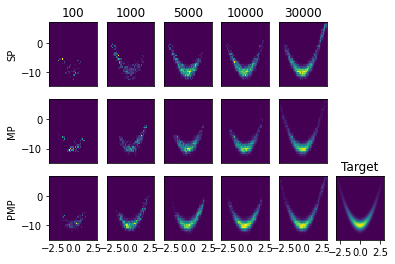

In [29]:
def banana_distribution(x):
    x1 = x[0]
    x2 = x[1]
    p = np.exp(-(x1**2)/2) * np.exp(-((x2 - 2*(x1**2 - 5))**2) / 2)
    return p
fig = plt.figure()
longs = [100,1000,5000,10000,30000]
epoch_size = len(longs)
for i,long in zip(range(epoch_size),longs):
    ax = fig.add_subplot(3, epoch_size +1, i + 1)
    dist = SP[:long]
   
    plt.xlim(-3,3)
    plt.ylim(-15,7)
    plt.title(str(long))
    plt.hist2d(dist[:, 0], dist[:, 1], bins=40, cmap='viridis',range=np.array([(-3, 3), (-15, 7)]))
    ax.tick_params(axis='x', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    if (i)%epoch_size !=0:
        ax.tick_params(axis='y', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    else:
        plt.ylabel('SP')
        
    ax = fig.add_subplot(3, epoch_size +1, epoch_size+1+i + 1)
    dist = MP[:long*4]
    plt.xlim(-3,3)
    plt.ylim(-15,7)
   
    plt.hist2d(dist[:, 0], dist[:, 1], bins=40, cmap='viridis',range=np.array([(-3, 3), (-15, 7)]))
    ax.tick_params(axis='x', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    if (epoch_size+1+i )%(epoch_size+1) !=0:
        ax.tick_params(axis='y', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    else:
        plt.ylabel('MP')
        
    ax = fig.add_subplot(3, epoch_size +1, epoch_size+1+epoch_size+1+i + 1)
    if (epoch_size+epoch_size+1+i + 1)%(epoch_size+1) !=0:
        ax.tick_params(axis='y', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    else:
        plt.ylabel('PMP')
        
    ax.tick_params(axis='x', which='both', length=0)
    dist = PMP[:long*16]

    plt.xlim(-3,3)
    plt.ylim(-15,7)
    
    plt.hist2d(dist[:, 0], dist[:, 1], bins=40, cmap='viridis',range=np.array([(-3, 3), (-15, 7)]))
ax = fig.add_subplot(3, epoch_size +1, 3*(epoch_size+1))  
ax.tick_params(axis='y', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
x1_range = np.linspace(-3, 3, 400)
x2_range = np.linspace(-15, 7, 400)
X1, X2 = np.meshgrid(x1_range, x2_range)
X = np.array([X1, X2])
P = banana_distribution(X)

plt.imshow(P, extent=(-3, 3, -15, 7), origin='lower', cmap='viridis', aspect='auto')

plt.xlim(-3,3)
plt.ylim(-15,7)
plt.title('Target')
plt.savefig("./bananav1.pdf")
